## Question 1.

### Q1(a).

#### Scrapping The data from <a href='https://www.bbcgoodfood.com'> BBC Good Food. </a>

In [78]:
from bs4 import BeautifulSoup
import urllib
import re
import urllib.request as urllib2
import pandas as pd

In [79]:
def printRecipe(url,recipe_id):
    list_ingredients=[]
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page)
    soup_rs=soup.find_all('li', class_="pb-xxs pt-xxs list-item list-item--separator")
    list_ingredients=[]
    print("INGREDIENTS SECTION\n\n")    
    for x in soup_rs:
        print('\t',re.compile(r'<[^>]+>').sub('', str(x)))   
    soup_rs=soup.find_all('div', class_="editor-content")
    i=0
    print("\n\nCOOKING INSTRUCTIONS\n\n")
    for x in soup_rs:
        st=str(x)
        i+=1
        if(len(re.compile(r'<[^>]+>').sub('', st))>0):
            print(i,'.',re.compile(r'<[^>]+>').sub('', st))   
    soup_ingredients=soup.find_all('a', class_="link link--styled")
    for x in soup_ingredients:
            list_ingredients.append(tuple([recipe_id,re.compile(r'<[^>]+>').sub('', str(x))]))
    return list_ingredients

In [80]:
list_URLs=['bombay-potato-frittata','spiced-lentil-butternut-squash-soup','roasted-red-pepper-tomato-soup-ricotta','power-packed-pasta-boxes','chickpea-tagine-soup','spicy-tuna-cottage-cheese-jacket','green-club-sandwich']
list_ingredients=[]
for url in list_URLs:
    print('\n_____________________________________'+url+'_______________________________________')
    list_ingredients+=printRecipe('https://www.bbcgoodfood.com/recipes/'+url,url)


_____________________________________bombay-potato-frittata_______________________________________
INGREDIENTS SECTION


	 4 new potatoes , sliced into 5mm rounds
	 100g baby spinach , chopped
	 1 tbsp rapeseed oil
	 1 onion , halved and sliced
	 1 large garlic clove , finely grated
	 ½ tsp ground coriander
	 ½ tsp ground cumin
	 ¼ tsp  black mustard seeds
	 ¼ tsp turmeric
	 3 tomatoes , roughly chopped
	 2 large eggs
	 ½ green chilli , deseeded and finely chopped
	 1 small bunch of coriander , finely chopped
	 1 tbsp mango chutney
	 3 tbsp fat-free  Greek yogurt


COOKING INSTRUCTIONS


1 . Pack in the flavour with this Indian-inspired frittata. Perfect for a healthy lunch, it's low in calories and fat and full of nutrients 
2 . Cook the potatoes in a pan of boiling water for 6 mins, or until tender. Drain and leave to steam-dry. Meanwhile, put the spinach in a heatproof bowl with 1 tbsp water. Cover and microwave for 3 mins on high, or until wilted.
3 . Heat the rapeseed oil in a me

INGREDIENTS SECTION


	 225g can tuna , drained
	 ½  red chilli , chopped
	 1 spring onion , sliced
	 handful halved cherry tomatoes
	 ½ small bunch  coriander , chopped
	 1 medium-sized jacket potato
	 150g low-fat cottage cheese


COOKING INSTRUCTIONS


1 . For a low-fat energy lunch try a carbohydrate-heavy baked potato with a light and nutritious filling
2 . Preheat the oven to 180C/Gas 4/fan oven 160C. Prick the potato several times with a fork and put it straight onto a shelf in the hottest part of the oven. Bake for approximately 1 hour, or until it is soft inside.
3 . Mix tuna with chilli, spring onion, cherry tomatoes and coriander. Split jacket potato and fill with the tuna mix and cottage cheese.

_____________________________________green-club-sandwich_______________________________________
INGREDIENTS SECTION


	 3 slices wholegrain or rye toast
	 3 tbsp ready-made hummus
	 1 small avocado (100g), stoned and sliced
	 1 handful rocket leaves
	 8-12 cherry tomatoes , sliced


### Q1(b).
<p> Storing the Recipe:</p>
<ol>
    <li> First I stored the Recipe ID-Ingredient pair into Pandas DataFrame</li>
    <li> Now I stored data Dataframe to  RecepieID_Ingredient.csv csv file</li>
</ol>

In [81]:
df = pd.DataFrame(list_ingredients, columns = ['Recipe ID', 'Ingredient'])  
df.to_csv('RecepieID_Ingredient.csv',index=False)

#### Q1(c).

###### Aspects of the recipes are being lost in the process of coarse-graining the recipe data:
<ol>
  <li> Data about cooking Steps is Lost.</li>
    <li> Step Sequence has lost.</li>
  <li> Ingredient Quantity has lost.</li>
  <li> The form in which we are using ingredients is lost</li>
    <li> Cooking time and step performing time has lost</li>
    
</ol>

### Q1(d).
<h3> To extract the most details from the recipe we can use other storing data structure where everything can be stored.</h3>
for example: Dataframe with more columns where we can store the quantity of the used ingredient and the form in which we are using them and other details and store it in a csv file.

### Question 2.

### Q2(a).

In [82]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from operator import itemgetter 
from itertools import chain 

In [83]:
path='/home/gaurav/Desktop/IIIT Delhi/Courses/CGAS/Assignments/Assignment1/683_1293_bundle_archive/train.json'
df=pd.read_json(path)
data = pd.read_json(path)  


In [84]:
list_All_ingredients=[]
list_no_of_ingredients=[]
for x in data['ingredients']:    
    list_All_ingredients+=x
    list_no_of_ingredients.append(len(x))  
list_ingredients=list(set(list_All_ingredients))
print("No of Recipes: ",len(data))
print("No of unique ingredients: ",len(list_ingredients))
print("No of cuisines: ",len(set(data['cuisine'])))

No of Recipes:  39774
No of unique ingredients:  6714
No of cuisines:  20


### Q2(b).

<h3> Statistics (bar plot) of number of recipes for each cuisine:</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'greek'),
  Text(1, 0, 'southern_us'),
  Text(2, 0, 'filipino'),
  Text(3, 0, 'indian'),
  Text(4, 0, 'jamaican'),
  Text(5, 0, 'spanish'),
  Text(6, 0, 'italian'),
  Text(7, 0, 'mexican'),
  Text(8, 0, 'chinese'),
  Text(9, 0, 'british'),
  Text(10, 0, 'thai'),
  Text(11, 0, 'vietnamese'),
  Text(12, 0, 'cajun_creole'),
  Text(13, 0, 'brazilian'),
  Text(14, 0, 'french'),
  Text(15, 0, 'japanese'),
  Text(16, 0, 'irish'),
  Text(17, 0, 'korean'),
  Text(18, 0, 'moroccan'),
  Text(19, 0, 'russian')])

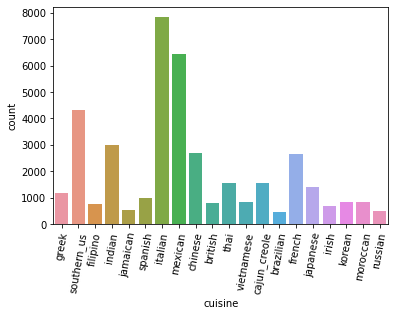

In [85]:
sns.countplot(data['cuisine'])
plt.xticks(rotation = 80,fontsize = 10)

### Q2(c).
<h3>Recipe size distribution plot for all the recipes:</h3>

In [86]:
def makecountPlot(list_num,l):
    list_distinct=list(set(list_num))
    list_distinct.sort()
    list_percentage_of_recipes=[]
    for x in list_distinct:
        list_percentage_of_recipes.append(list_num.count(x)*100/l)
    return list_distinct, list_percentage_of_recipes    

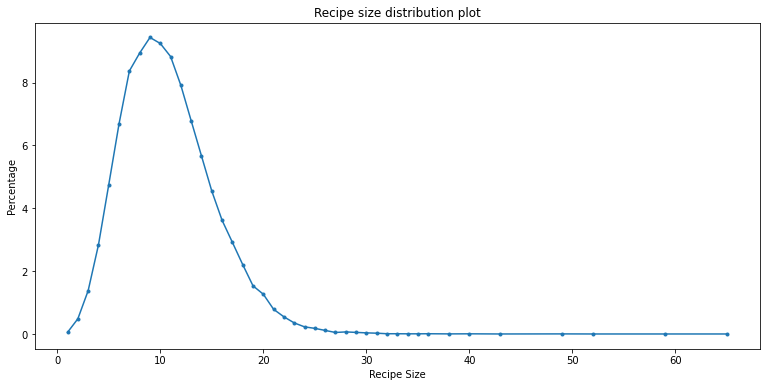

In [87]:
x_val,y_val=makecountPlot(list_no_of_ingredients,len(list_no_of_ingredients))
plt.figure(figsize=(13, 6))
plt.plot(x_val,y_val,'.-') 
plt.xlabel('Recipe Size') 
plt.ylabel('Percentage') 
plt.title('Recipe size distribution plot') 
plt.show() 

<h3>Recipe size distribution plot for each cuisine:</h3>

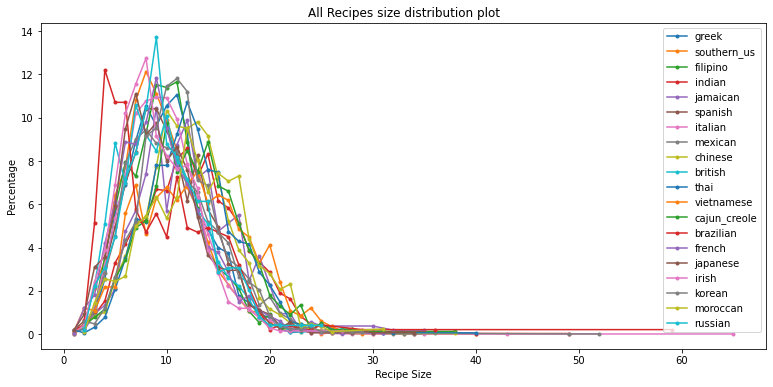

In [88]:
dict_all_cuisine_size={}
dict_cusine_ingredients={}
for i in range( len(data['cuisine'])):
    if data['cuisine'].loc[i] not in dict_all_cuisine_size:
        dict_all_cuisine_size[data['cuisine'].loc[i]]=[]
    dict_all_cuisine_size[data['cuisine'].loc[i]].append(len(data['ingredients'].loc[i]))
    if data['cuisine'].loc[i] not in dict_cusine_ingredients:
        dict_cusine_ingredients[data['cuisine'].loc[i]]=[]
    dict_cusine_ingredients[data['cuisine'].loc[i]]+=(list(data['ingredients'].loc[i]))
plt.figure(figsize=(13, 6))
for x in dict_all_cuisine_size:
    x_val,y_val=makecountPlot(dict_all_cuisine_size[x],len(dict_all_cuisine_size[x]))
    plt.plot(x_val, y_val,  '.-',label=x)
    plt.legend(loc="upper right",prop={'size': 10})
plt.xlabel('Recipe Size') 
plt.ylabel('Percentage') 
plt.title('All Recipes size distribution plot') 
plt.show()   

### Q2(d).
<h3>Cumulative distribution plot of All recipe size.</h3>

In [89]:
def plot_recipe_cum_distribution(list_no_of_ingredients):
    list_no_of_ingredients.sort()
    dist_list_no_of_ingredients=set(list_no_of_ingredients)
    l=len(list_no_of_ingredients)
    list_fraction_of_recipe=[]
    for x in dist_list_no_of_ingredients:
        index=list_no_of_ingredients.index(x)
        fraction=(l-index)/l
        list_fraction_of_recipe.append(fraction)
    return  list(dist_list_no_of_ingredients),list_fraction_of_recipe

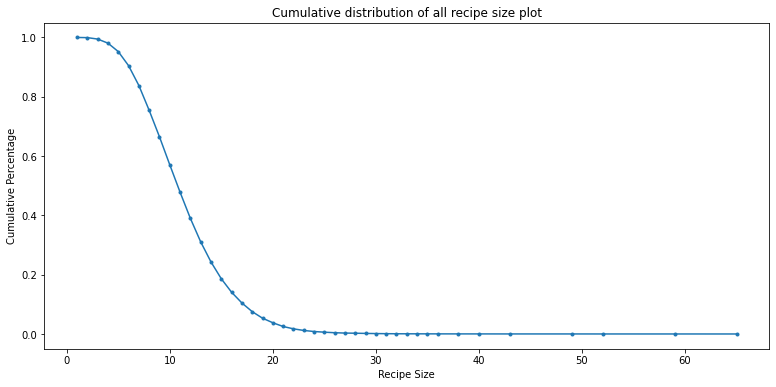

In [90]:
x_val,y_val=plot_recipe_cum_distribution(list_no_of_ingredients)
plt.figure(figsize=(13, 6))
plt.plot(x_val, y_val, '.-',label=x)
plt.xlabel('Recipe Size') 
plt.ylabel('Cumulative Percentage') 
plt.title('Cumulative distribution of all recipe size plot') 
plt.show() 

<h3>Cumulative distribution plot of cuisines recipe size.</h3>

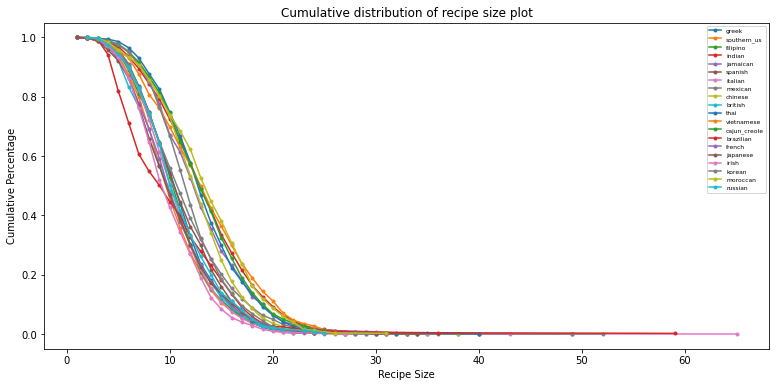

In [91]:
plt.figure(figsize=(13, 6))
for x in dict_all_cuisine_size:
    x_val,y_val=plot_recipe_cum_distribution(dict_all_cuisine_size[x])
    plt.plot(x_val, y_val,'.-', label=x)
    plt.legend(loc="upper right",prop={'size': 6})
plt.xlabel('Recipe Size') 
plt.ylabel('Cumulative Percentage') 
plt.title('Cumulative distribution of recipe size plot') 
plt.show() 

### Interpretations

<ol>
    <li>All the recipe uses more than 1 ingredient.</li>    
    <li>Most of the cuisines prepared by using less than 20 ingredients</li>
    <li>There are very less cousines who uses more than 25 ingredients.</li>
    
</ol>

### Question 3


### Q3(a).

In [92]:
def plot_frequency_rank_distribution(list_All_ingredients,lab):
    dict_ingredient_count={}
    for x in list_All_ingredients:
        if x not in dict_ingredient_count:
            dict_ingredient_count[x]=1
        else: 
            dict_ingredient_count[x]+=1 
    dict_ingredient_count=sorted(dict_ingredient_count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    ingredient_count_list=[]
    i=1
    rank=[]
    for x in dict_ingredient_count:
        rank.append(i)
        i+=1
        ingredient_count_list.append(x[1])
    ingredient_count_list = np.array(ingredient_count_list)
#     print(ingredient_count_list)
    ingredient_count_list=ingredient_count_list/ingredient_count_list[0]
    plt.xlim(1e-1, 1e4)
    plt.ylim(1e-5, 1e1)
    plt.loglog(rank,ingredient_count_list,'.-',label=lab)
    
    plt.xlabel('Rank') 
    plt.ylabel('Frequency') 
    plt.legend(loc="upper right",prop={'size': 8})

Text(0.5, 1.0, 'Frequency-rank distribution for all the recipes')

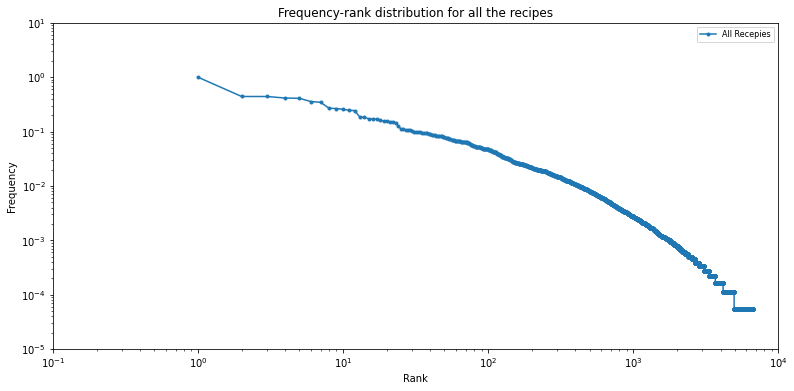

In [93]:
plt.figure(figsize=(13, 6))
plot_frequency_rank_distribution(list_All_ingredients,'All Recepies')
plt.title('Frequency-rank distribution for all the recipes') 

### Interpretations
<ol>
    <li> World Recipe's ingredient rank plot follows power low</li>
    <li> Some ingredients are used in most of the recipe they have high rank for ex. salt.</li>
    
</ol>

### Q3(b).
<h4> Top 10 most popular ingredients in the recipes.</h4>

In [94]:
def find_important_ingredients(list_cusine_ingredients):
    dict_ingredient={}
    for x in list_cusine_ingredients:
        if x not in dict_ingredient:
            dict_ingredient[x]=0
        dict_ingredient[x]+=1
    dict_ingredient=sorted(dict_ingredient.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    list_imp_ingredients=[]
    for x in dict_ingredient[:10]:
        list_imp_ingredients.append(x[0])
    return list_imp_ingredients

In [95]:
print("Top 10 important ingredients: ", find_important_ingredients(list_All_ingredients))

Top 10 important ingredients:  ['salt', 'onions', 'olive oil', 'water', 'garlic', 'sugar', 'garlic cloves', 'butter', 'ground black pepper', 'all-purpose flour']


### Q3(c).

Text(0.5, 1.0, 'Frequency-rank distribution for recipes')

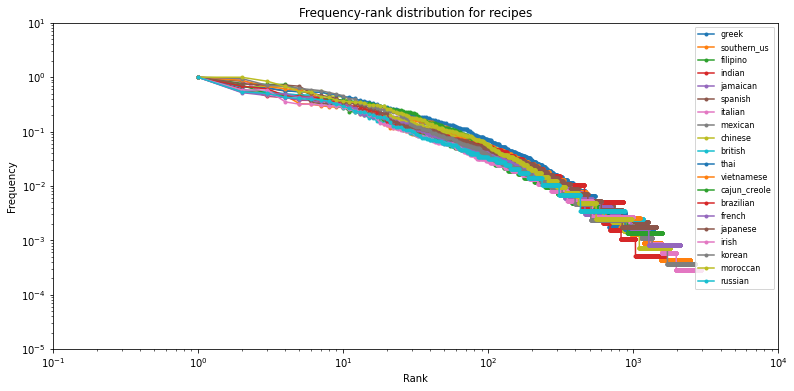

In [96]:
i=0
plt.figure(figsize=(13, 6))
for x in dict_cusine_ingredients:
    plot_frequency_rank_distribution(dict_cusine_ingredients[x],x)  
plt.title('Frequency-rank distribution for recipes') 

In [97]:
for x in dict_cusine_ingredients:
    print("List of top 10 important ingredients in recepe",x,":\n",find_important_ingredients(dict_cusine_ingredients[x]),'\n')

List of top 10 important ingredients in recepe greek :
 ['salt', 'olive oil', 'dried oregano', 'garlic cloves', 'feta cheese crumbles', 'extra-virgin olive oil', 'fresh lemon juice', 'ground black pepper', 'garlic', 'pepper'] 

List of top 10 important ingredients in recepe southern_us :
 ['salt', 'butter', 'all-purpose flour', 'sugar', 'large eggs', 'baking powder', 'water', 'unsalted butter', 'milk', 'buttermilk'] 

List of top 10 important ingredients in recepe filipino :
 ['salt', 'garlic', 'water', 'onions', 'soy sauce', 'pepper', 'oil', 'sugar', 'carrots', 'ground black pepper'] 

List of top 10 important ingredients in recepe indian :
 ['salt', 'onions', 'garam masala', 'water', 'ground turmeric', 'garlic', 'cumin seed', 'ground cumin', 'vegetable oil', 'oil'] 

List of top 10 important ingredients in recepe jamaican :
 ['salt', 'onions', 'water', 'garlic', 'ground allspice', 'pepper', 'scallions', 'dried thyme', 'black pepper', 'garlic cloves'] 

List of top 10 important ingred

### Q3(d).

### Interpretations

<ol>
    <li> World Recipe's ingredient rank plot follows power low.</li>
    <li> Some ingredients are used in most of the recipe they have high rank for ex. salt.</li>
    <li> Negative slope shows there are some ingredients they are used less frequently than some other ingredients.</li>
    <li>Bottom end is falling faster because some ingredients has less frequency and they are used rarely in the cusines.</li>

</ol>